In [5]:
import Bio.SeqIO as SeqIO
# Analyze GC content
LTRs = [rec for rec in SeqIO.parse("/var/tmp/xhorvat9/ltr_bert/FASTA_files/train_LTRs.fasta","fasta")]
non_LTRs = [rec for rec in SeqIO.parse("/var/tmp/xhorvat9/ltr_bert/FASTA_files/non_LTRs_training.fasta","fasta")]

LTRs_GC_content = 0

for ltr in LTRs:
    sequence = str(ltr.seq)
    gc_count = sequence.count('G') + sequence.count('C')
    total_bases = len(sequence)
    gc_content = (gc_count / total_bases) * 100
    LTRs_GC_content += gc_content

non_LTRs_GC_content = 0

for ltr in non_LTRs:
    sequence = str(ltr.seq)
    gc_count = sequence.count('G') + sequence.count('C')
    total_bases = len(sequence)
    gc_content = (gc_count / total_bases) * 100
    non_LTRs_GC_content += gc_content

print("LTR GC content: ", LTRs_GC_content/len(LTRs), "non LTR GC content", non_LTRs_GC_content/len(non_LTRs))

LTR GC content:  39.21550952990535 non LTR GC content 38.46951615777295


In [28]:
import Bio.SeqIO as SeqIO
import pandas as pd
import numpy as np

sequences, superfamilies, lineages, lengths, species = [], [], [], [], []

# >Contig00004_1871168_1881814 Ammopiptanthus_nanus.fa ltr5 gypsy Tekay
for rec in SeqIO.parse("./sampled_from_clusters.fasta","fasta"):
    sequences.append(str(rec.seq))
    superfamilies.append(rec.description.split(" ")[3])
    lineages.append(rec.description.split(" ")[4])
    lengths.append(len(rec.seq))
    species.append(" ".join(rec.description.split(" ")[1].split("_")[:2]).split(".")[0])

In [29]:
dt = pd.DataFrame({"Seq": sequences, "length": lengths,"lineage": lineages, "superfamily": superfamilies, "species": species})

In [8]:
dt.species.value_counts().to_csv('species.csv')

IndexError: index 4 is out of bounds for axis 0 with size 4

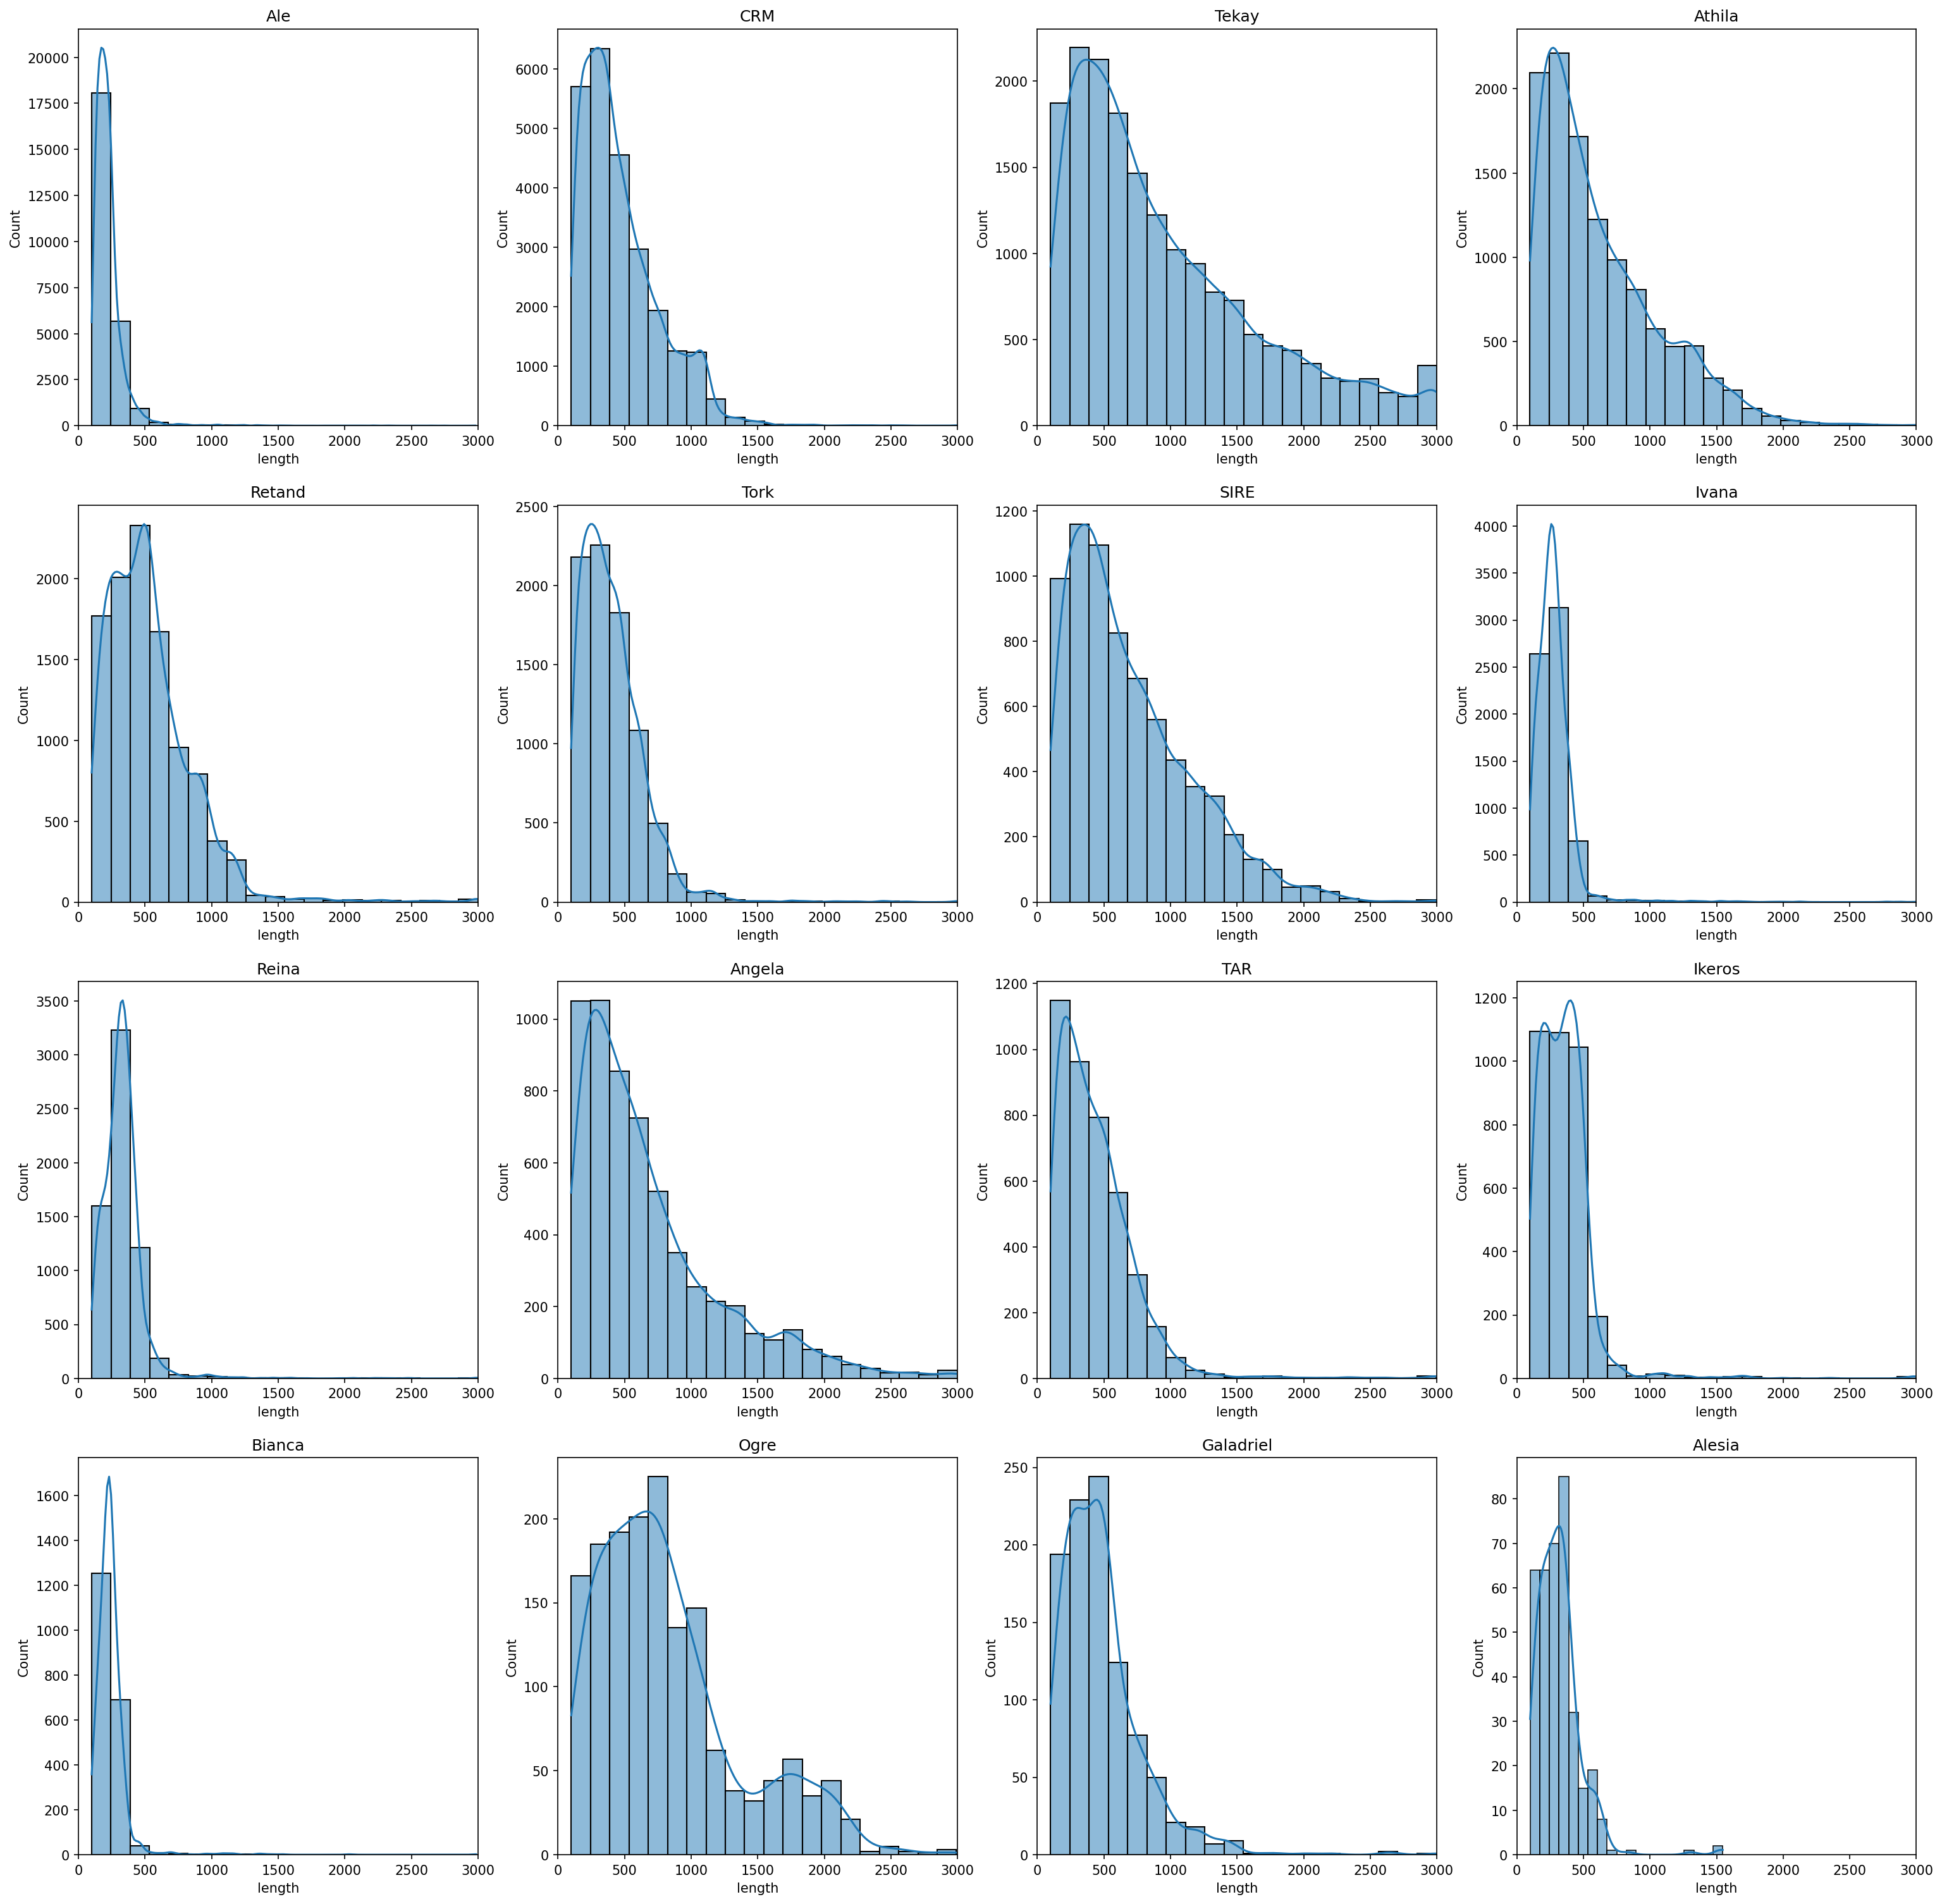

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
lineages = list(dt["lineage"].value_counts().index)
lineages.remove("copia")
lineages.remove("NAN")
lineages.remove("TatII")
lineages.remove("Tat")
factor = 2
fig, axs = plt.subplots(4,4,figsize=(25,25), dpi=150)
for i in range(5):
    for j in range(4):
        if i*4+j >= len(lineages):
            break
        l = lineages[i*4+j]
        (counts, bins) = np.histogram(dt[dt["lineage"] == l]["length"], bins = 20)


        #axs[i,j].hist(dt[dt["lineage"] == l]["length"], edgecolor='black')#, weights=factor*counts, bins )
        axs[i,j].set(xlim=(0,3000))
        axs[i,j].set_title(l)
        sns.histplot(data=dt[dt["lineage"] == l]["length"], ax=axs[i,j], kde=True, bins=20)
        

<Axes: xlabel='lineage'>

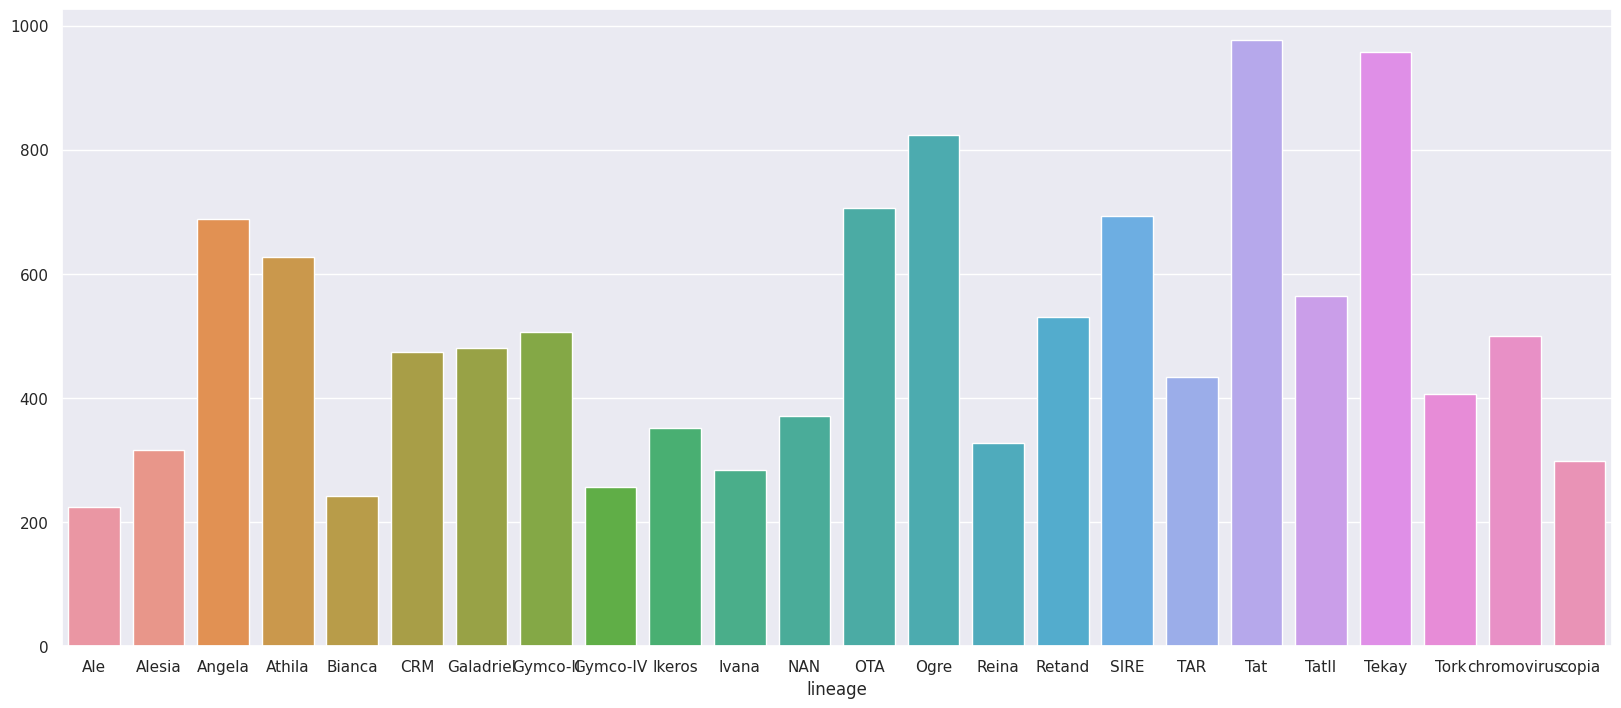

In [16]:
sns.set(rc={'figure.figsize':(20,8.27)})
sns.barplot( x=dt[["lineage", "length"]].groupby("lineage").describe().length["mean"].index, y=dt[["lineage", "length"]].groupby("lineage").describe().length["mean"].values)

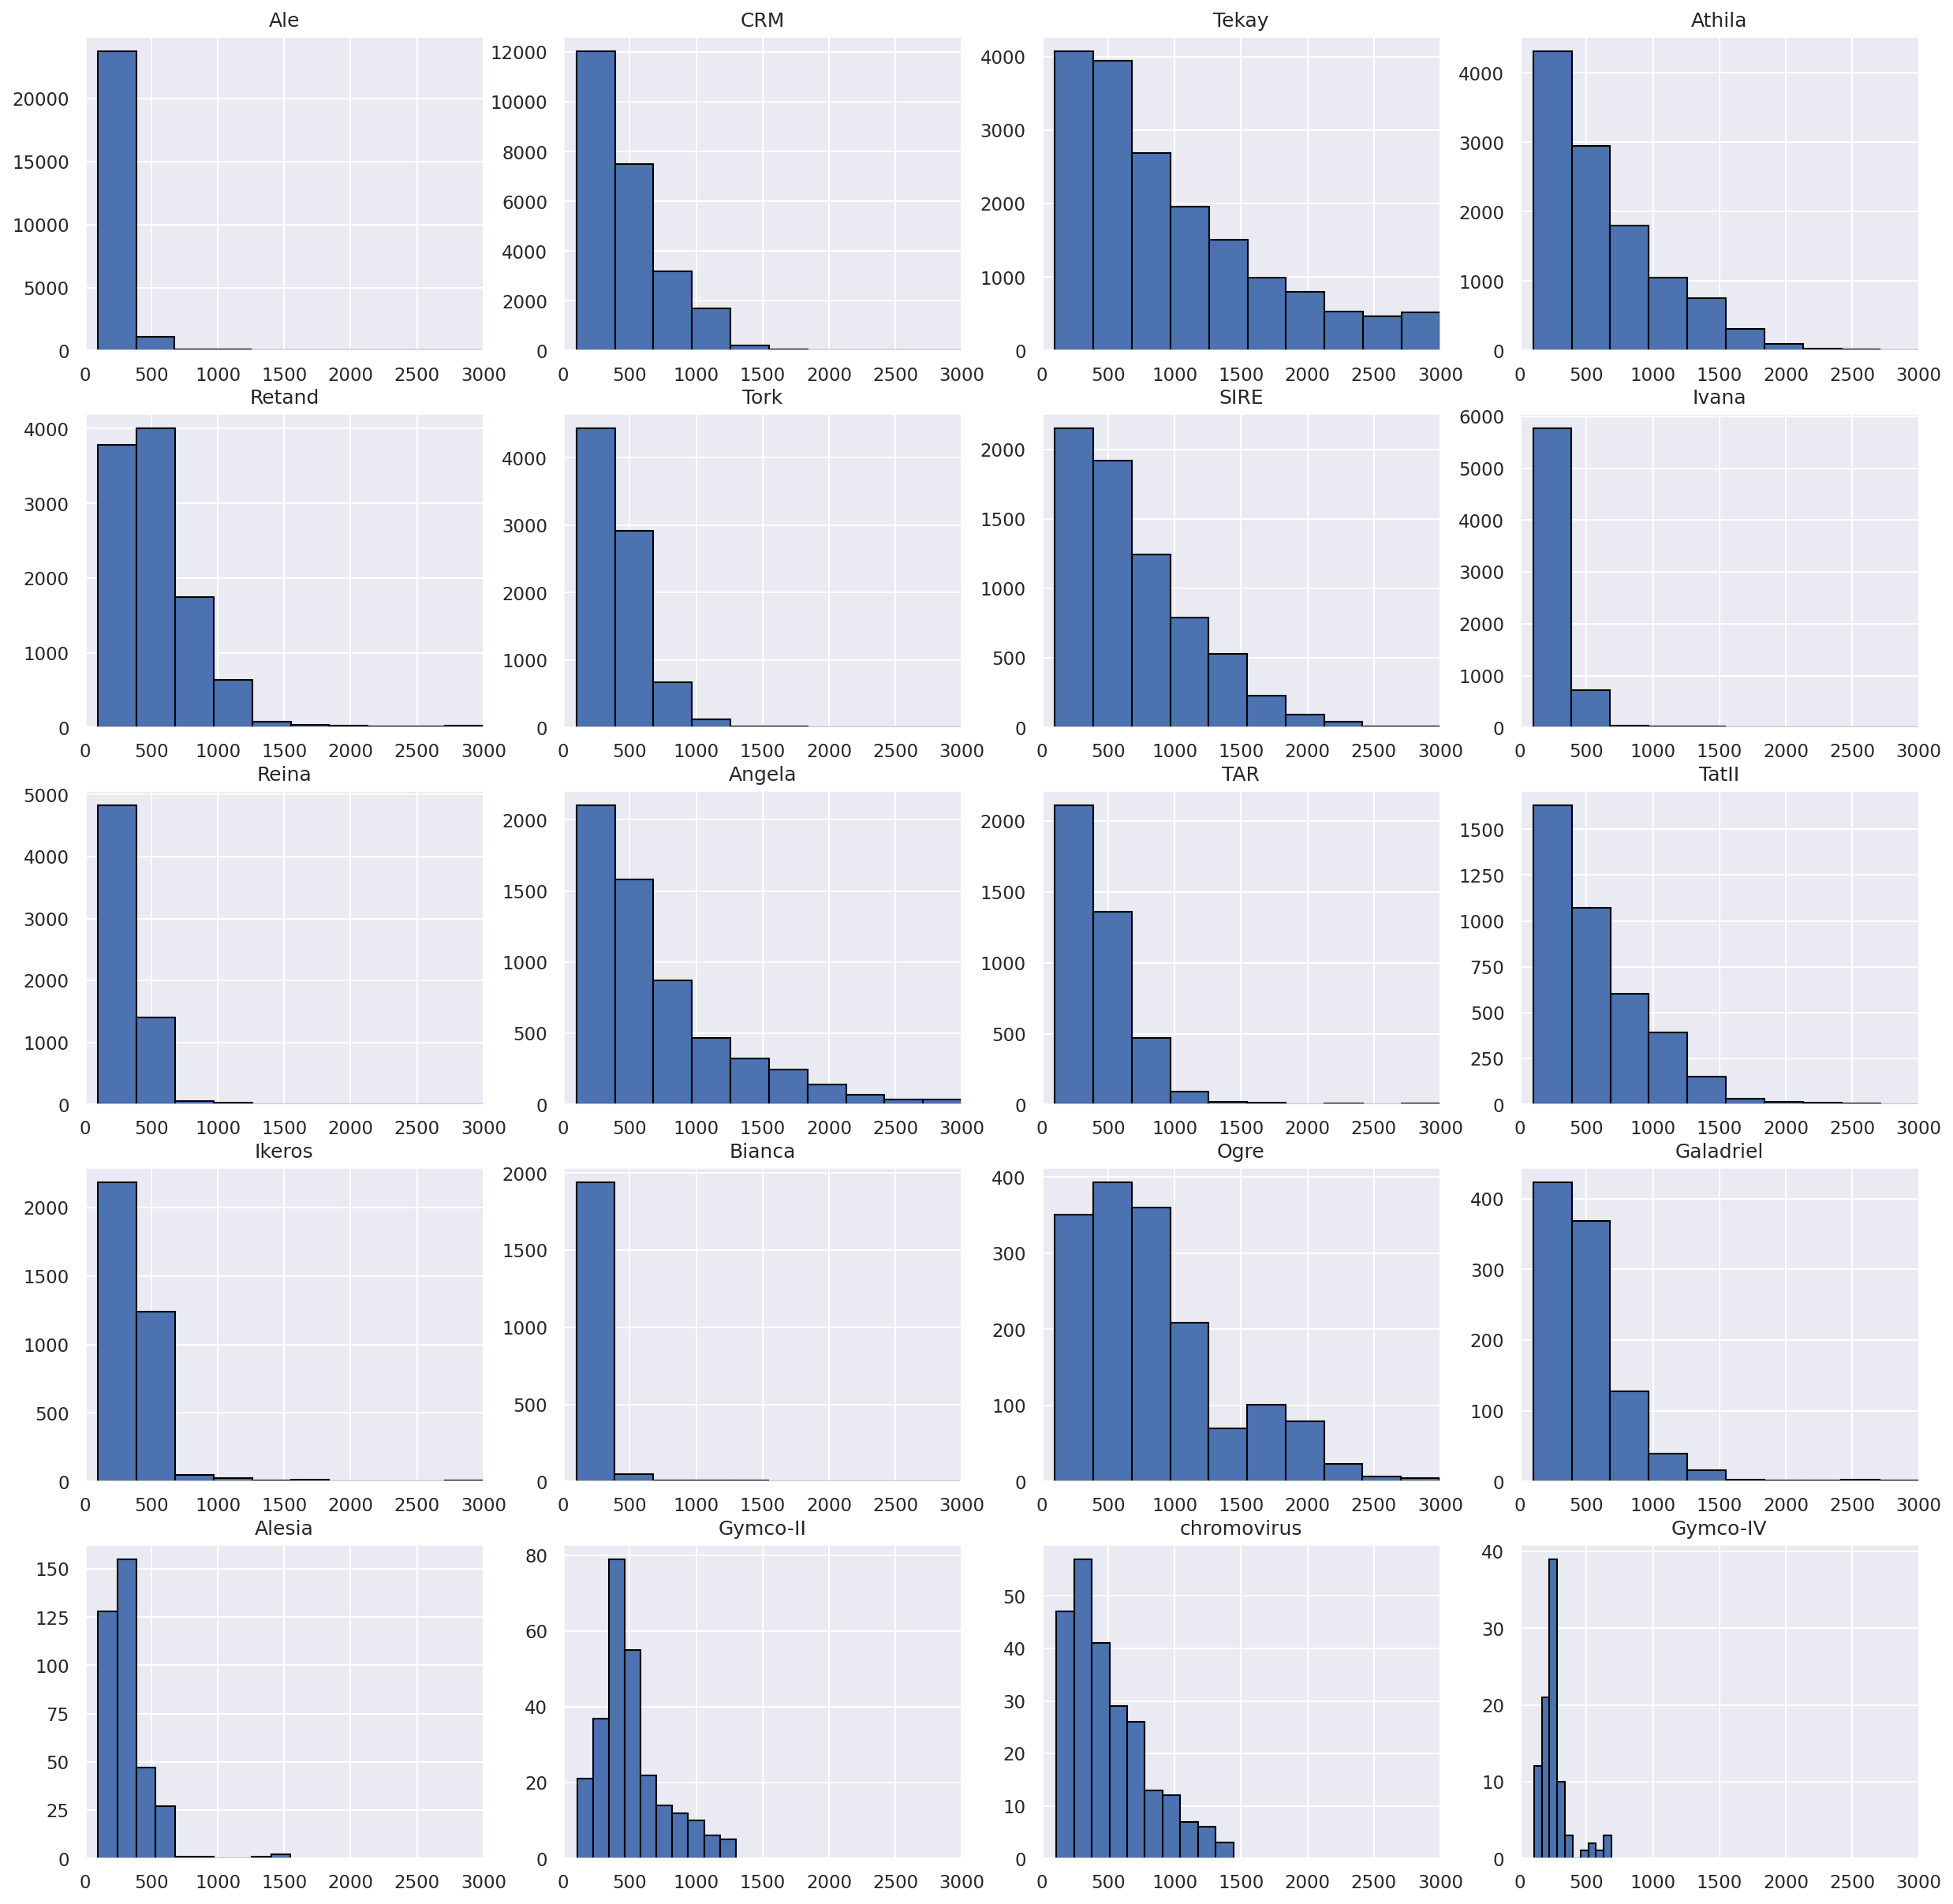

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
lineages = list(dt["lineage"].value_counts().index)
lineages.remove("copia")
lineages.remove("NAN")
factor = 2
fig, axs = plt.subplots(5,4,figsize=(20,20), dpi=150)
for i in range(5):
    for j in range(4):
        if i*4+j >= len(lineages):
            break
        (counts, bins) = np.histogram(dt[dt["lineage"] == l]["length"], bins = 20)

        l = lineages[i*4+j]
        axs[i,j].hist(dt[dt["lineage"] == l]["length"], edgecolor='black')#, weights=factor*counts, bins )
        axs[i,j].set(xlim=(0,3000))
        axs[i,j].set_title(l)

In [18]:
dt["superfamily"].value_counts()

superfamily
gypsy    76976
copia    64986
NAN        539
Name: count, dtype: int64

Text(0.5, 1.0, 'Copia Superfamily')

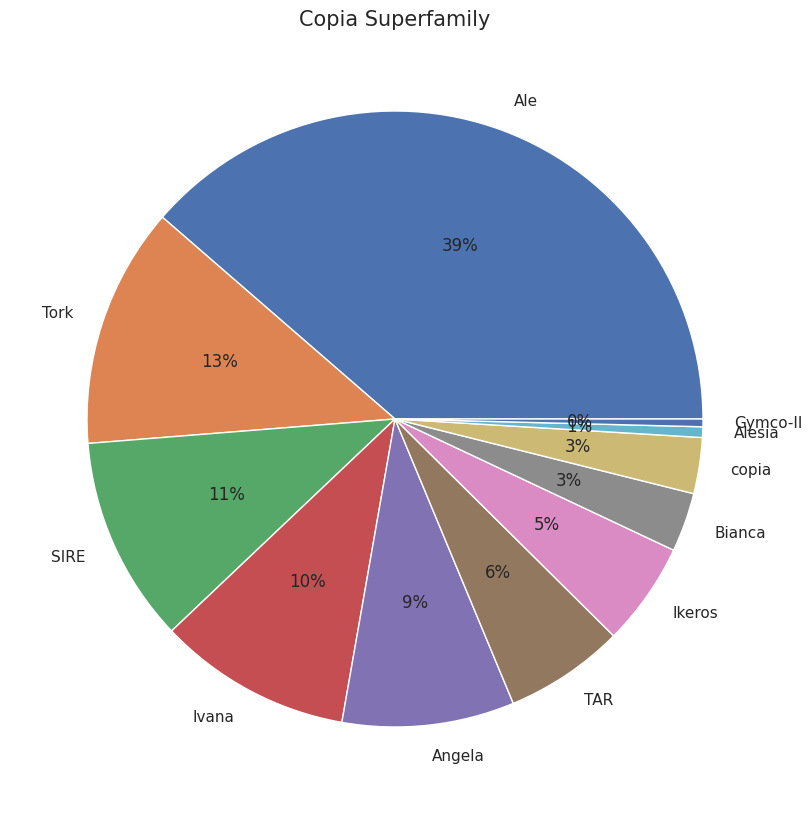

In [19]:
counts = dt[dt["superfamily"] == "copia"]["lineage"].value_counts().values[:-1]
keys = list(dt[dt["superfamily"] == "copia"]["lineage"].value_counts().index)[:-1]
copia = ["angela", "tar", "bianca","ale", "maximus", "ivana" ]
plt.figure(figsize=(10,10), dpi=100)
plt.pie(x=counts, labels=keys, autopct='%.0f%%');
plt.title("Copia Superfamily", fontsize=15)

Text(0.5, 1.0, 'Gypsy Superfamily')

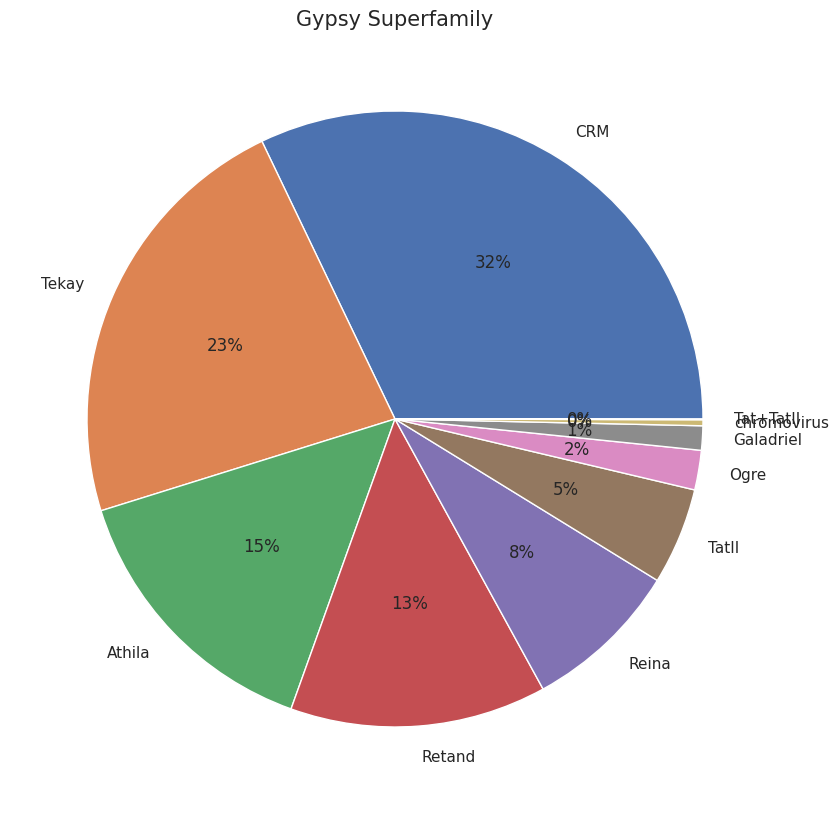

In [20]:
counts = dt[dt["superfamily"] == "gypsy"]["lineage"].value_counts().values[:-1]
keys = list(dt[dt["superfamily"] == "gypsy"]["lineage"].value_counts().index)[:-1]
keys[-1] = "Tat+TatII"
copia = ["angela", "tar", "bianca","ale", "maximus", "ivana" ]
plt.figure(figsize=(10,10))
plt.pie(x=counts, labels=keys, autopct='%.0f%%');
plt.title("Gypsy Superfamily", fontsize=15)

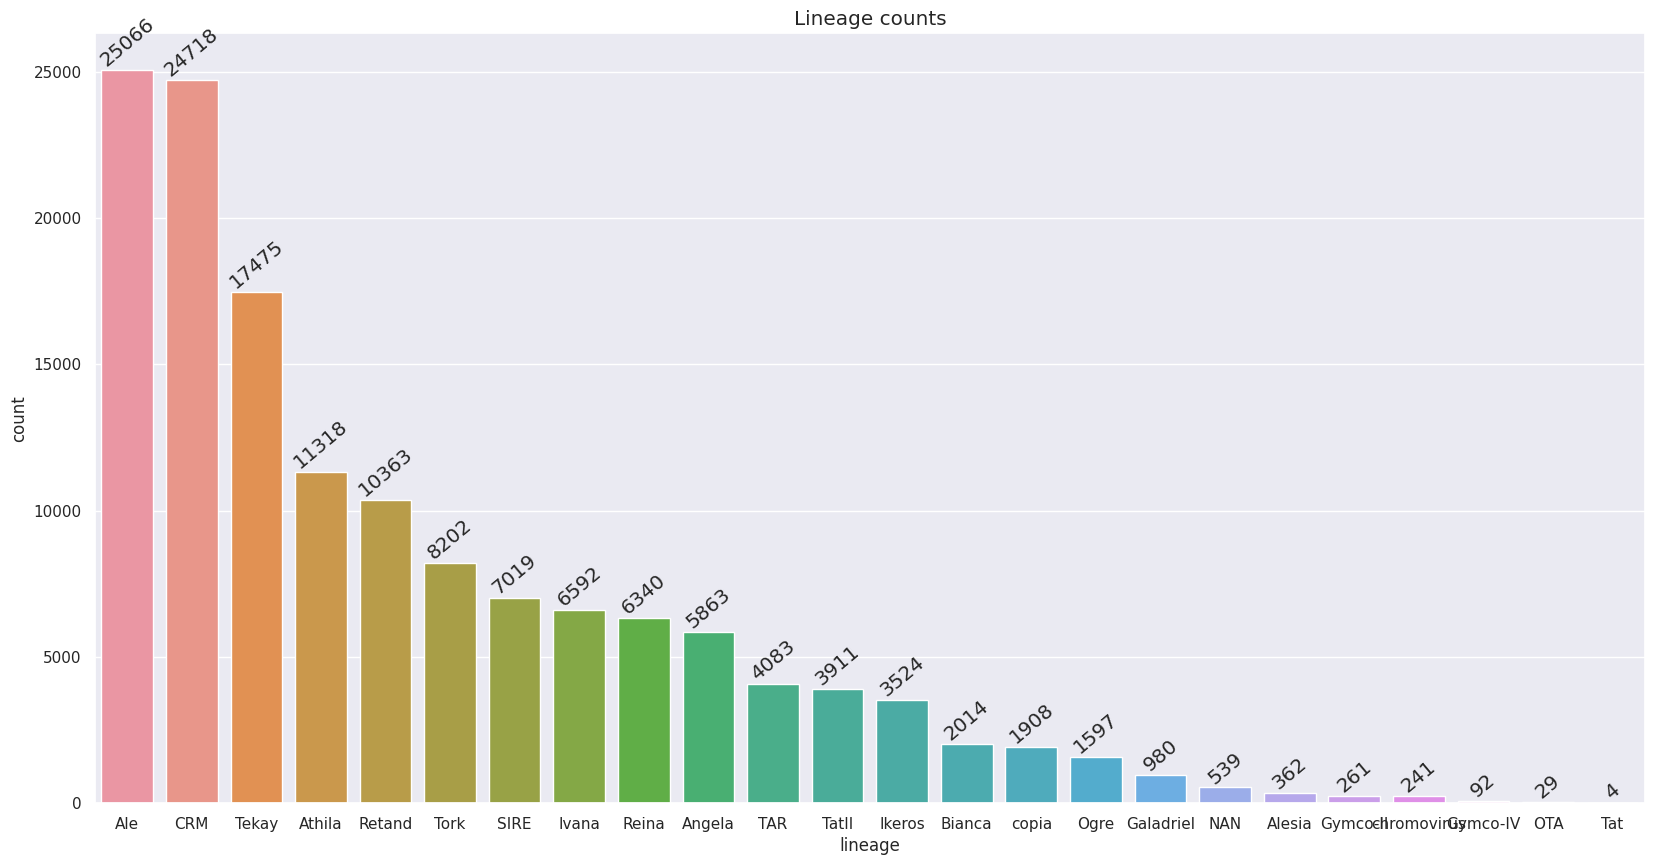

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(20,10))
sns.set(font_scale=1.2)
sns.countplot(data=dt, x="lineage", order = dt["lineage"].value_counts().index).set_title("Lineage counts")
ax.bar_label(ax.containers[-1], label_type='edge', rotation=40);

In [22]:
print("Number of unique species",len(dt['species'].value_counts().index))

Number of unique species 67


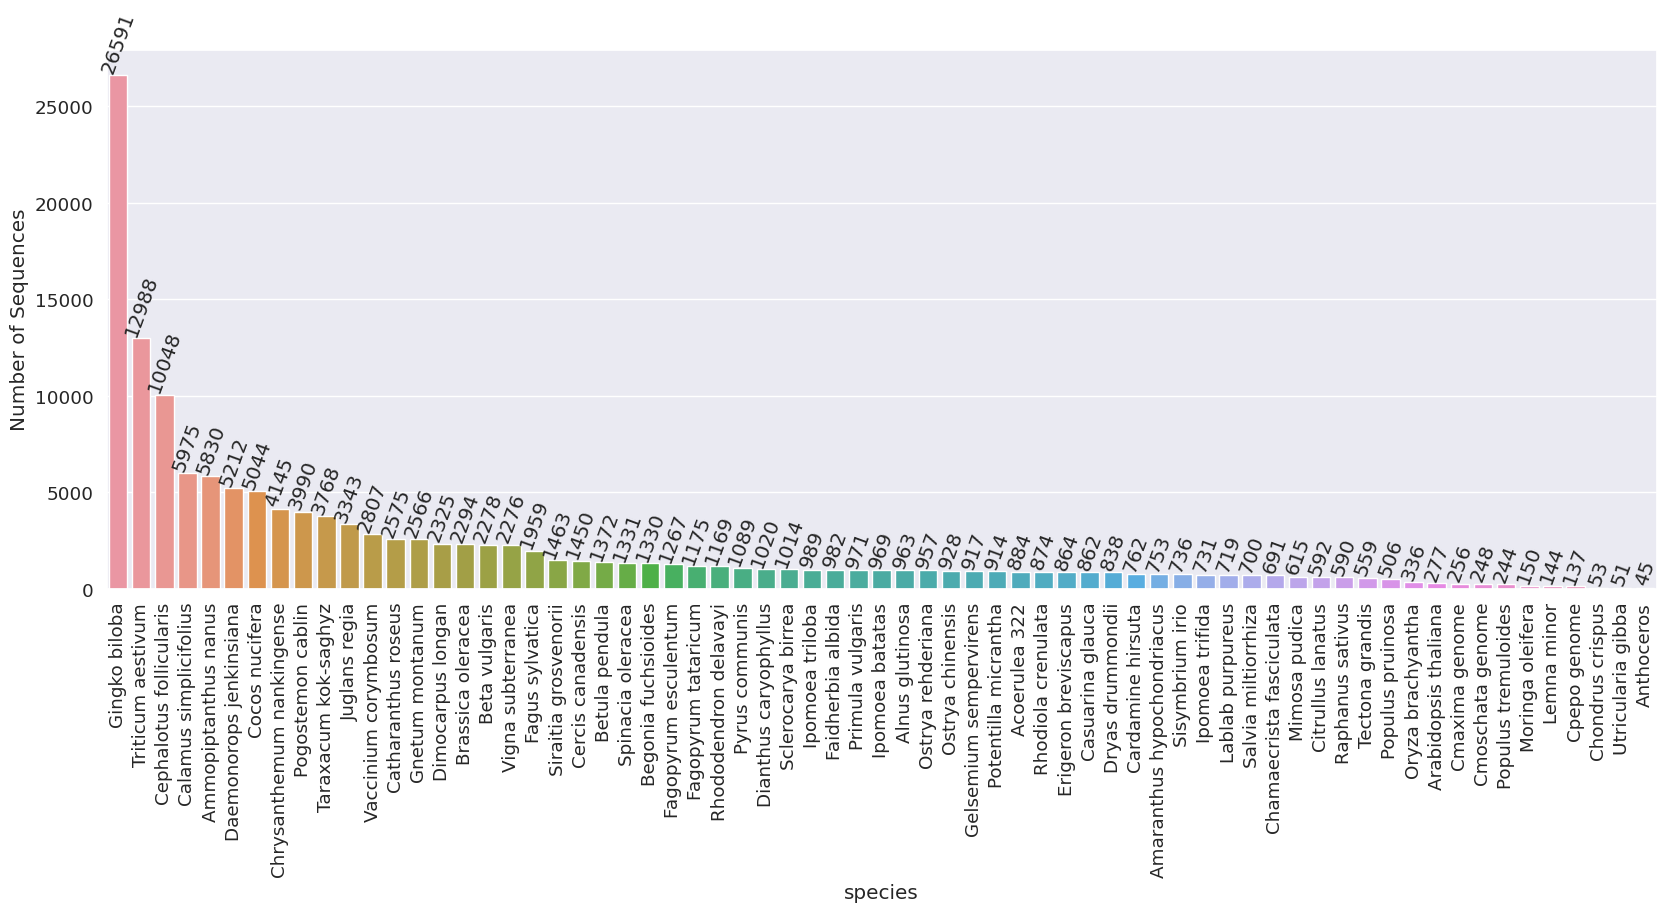

In [23]:
fig, ax = plt.subplots(figsize=(20,7))
g = sns.countplot(x = "species", data=dt, order=dt['species'].value_counts().index);
g.set_xticklabels(g.get_xticklabels(),rotation = 90);
g.set_ylabel("Number of Sequences");
ax.bar_label(ax.containers[-1], label_type='edge', rotation=70);

In [46]:
counts = pd.read_csv("ltr_counts.csv", sep=" ")
counts["species"] = counts["species"].apply(lambda x: " ".join(x[2:-4].split("_")))
counts

,count,species
0,35499,Abies alba
1,2424,Actinidia chinensis
2,58080,Aegilops tauschii
3,409,Aethionema arabicum
4,1100,Alnus glutinosa
...,...,...
295,766,Zostera marina
296,1289,Zostera muelleri
297,2069,Zoysia japonica
298,3961,Zoysia matrella


In [47]:
c = dt["species"].value_counts()

In [51]:
d = pd.merge(c, counts, on="species", how="inner")
d.columns = ["species", "filtered_count", "annotation_count"]
d

,species,filtered_count,annotation_count
0,Triticum aestivum,12988,153318
1,Cephalotus follicularis,10048,24424
2,Calamus simplicifolius,5975,32437
3,Ammopiptanthus nanus,5830,12259
4,Daemonorops jenkinsiana,5212,20087
5,Cocos nucifera,5044,19546
6,Chrysanthemum nankingense,4145,8630
7,Pogostemon cablin,3990,9700
8,Juglans regia,3343,3896
9,Vaccinium corymbosum,2807,7387
